# Generate datasets 
#### from https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py 

In [2]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

from pandas import DataFrame

## Two classes, linearly separable

/Users/andyvarner/mambaforge/envs/ci/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


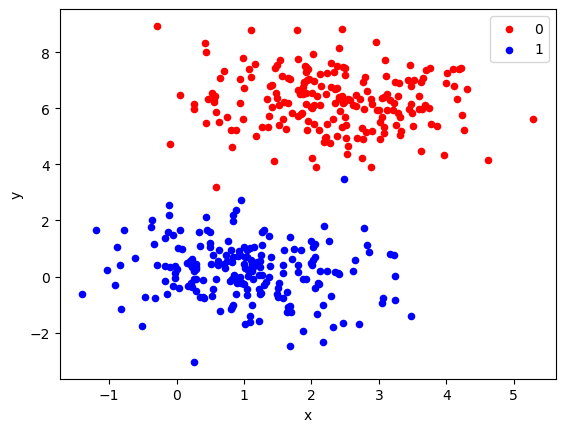

In [3]:
X, y = datasets.make_blobs(n_samples=400, centers=2, n_features=2, center_box = (0,10), cluster_std = 1)

df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

## Two classes, not linearly separable

/Users/andyvarner/mambaforge/envs/ci/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


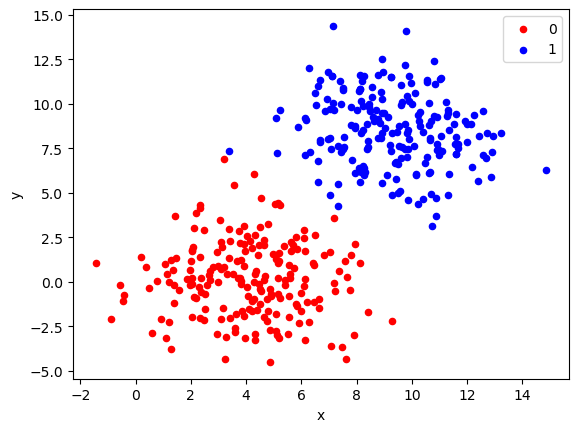

In [4]:
X, y = datasets.make_blobs(n_samples=400, centers=2, n_features=2, center_box = (0,10), cluster_std = 2)

df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

## Two classes, highly nonlinearly separable
 #### https://gist.github.com/45deg/e731d9e7f478de134def5668324c44c5

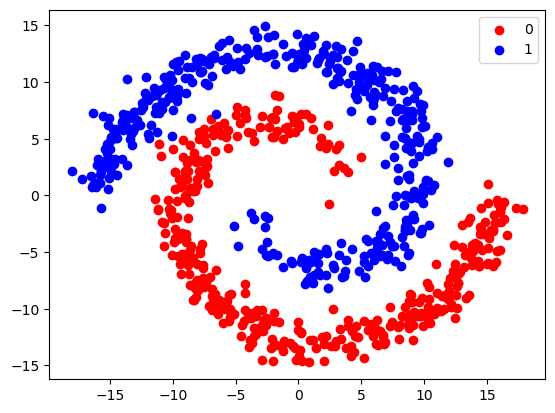

In [5]:
X, y = datasets.make_moons(n_samples=100, noise=0.1)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

N = 400
theta = np.sqrt(np.random.rand(N))*2*np.pi # np.linspace(0,2*pi,100)

r_a = 2*theta + np.pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
x_a = data_a + np.random.randn(N,2)

r_b = -2*theta - np.pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
x_b = data_b + np.random.randn(N,2)

res_a = np.append(x_a, np.zeros((N,1)), axis=1)
res_b = np.append(x_b, np.ones((N,1)), axis=1)

res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)

plt.scatter(x_a[:,0],x_a[:,1], color='r',label = '0')
plt.scatter(x_b[:,0],x_b[:,1], color='b',label = '1')
plt.legend()


## 10 classes, not linearly separable
#### 

In [6]:

def create_clouds(num_samples, all_means, all_stds, num_features = 2):
    
    all_samples, all_labels = [], []
    for i, (mean, std) in enumerate(zip(all_means, all_stds)):
        
        all_samples.append(np.random.normal(mean, std, (num_samples, num_features)))
        all_labels.append([i] * num_samples)
        
    return np.vstack(all_samples), np.hstack(all_labels)

def plot_stuff(all_samples, all_labels):
    
    plt.style.use("seaborn")

    fig, ax = plt.subplots()
    ax.scatter(all_samples[:, 0], all_samples[:, 1], c = all_labels, cmap = "Set1")
    ax.set_xlabel("x0")
    ax.set_ylabel("x1")
    
    fig.tight_layout()

/var/folders/lh/6svpwf5n6zzg8m2whfkn1n2h0000gn/T/ipykernel_40773/3020568146.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


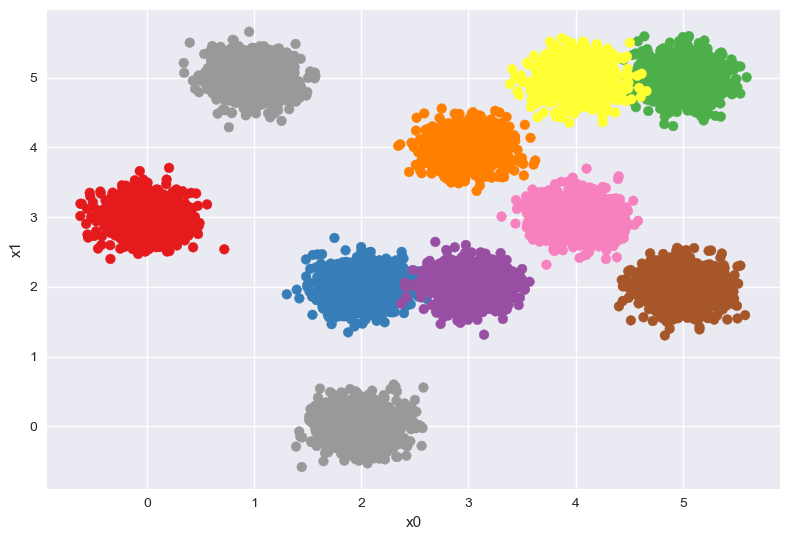

In [7]:
num_samples = 1000
num_classes = 10

all_stds = np.full(num_classes, 0.2)
all_means = [(0, 3), 
             (2, 2), 
             (5, 5), 
             (3, 2), 
             (3, 4), 
             (4, 5), 
             (5, 2), 
             (4, 3), 
             (2, 0), 
             (1, 5)
            ]

all_samples, all_labels = create_clouds(num_samples, all_means, all_stds)

plot_stuff(all_samples, all_labels)